# A. Perkenalan - GC 1

Nama : Handoko Pramulyo (FTDS batch 14)

Email : handoko.pramulyo.14@gmail.com

Objective dari data yang akan diolah adalah ...
    ```
    Pokemon generasi terakhir memiliki rata-rata total power (Total Stat Average) yang lebih tinggi dibandingkan dengan semua pokemon di generasi lainnya.
    ```
Apakah statement ini benar... Let's find out!

This dataset includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:

- #: ID for each pokemon
- Name: Name of each pokemon
- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2: Some pokemon are dual type and have 2
- Total: sum of all stats that come after this, a general guide to how strong a pokemon is
- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack: the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round

# B. Import pustaka yang dibutuhkan

In [312]:
# Import numpy & pandas library

import pandas as pd

# C. Data Loading

In [313]:
# load file yang akan diproses
df = pd.read_csv('Pokemon.csv')

In [314]:
# Show data & identifikasi data
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [315]:
# cek info dari data; kelengkapan & jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


# D. Data Cleaning + REPLACE

Data Cleaning from NaN & incorrect Dtype
After melakukan .head & .info pada dataframe df, ditemukan:
```
1. ID yang dipakai = ID pokemon standar. No Duplikasi ID (Tot ID --> 721)
2. kolom Type 2 count tidak sama dengan yg lain = ada data kosong pada kolom tsb
3. kolom Name, Type 1, & Type 2 seharusnya adalah string
4. Additional Delete Unused Columns
```

### 1. Remove Duplicate ID in kolom `#`

In [316]:
# Define ulang dataframe baru after ID duplikasi dihapus
df = df.drop_duplicates(subset=['#'])

In [317]:
# melakukan pengecekan dataframe df yang baru. DONE : duplikasi sudah hilang
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [318]:
# Pengecekan jumlah data = sum 721
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           721 non-null    int64 
 1   Name        721 non-null    object
 2   Type 1      721 non-null    object
 3   Type 2      350 non-null    object
 4   Total       721 non-null    int64 
 5   HP          721 non-null    int64 
 6   Attack      721 non-null    int64 
 7   Defense     721 non-null    int64 
 8   Sp. Atk     721 non-null    int64 
 9   Sp. Def     721 non-null    int64 
 10  Speed       721 non-null    int64 
 11  Generation  721 non-null    int64 
 12  Legendary   721 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 73.9+ KB


### 2. Data Cleaning + Replace di kolom ```Type 2```

In [319]:
# Spesifik data clearing untuk kolom Type 2
# Karena sesuai karakter, Type 2 Pokemon yg NaN akan diisi dengan data di Type 1
df.iloc[:, [2,3]]

,Type 1,Type 2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
4,Fire,NaN
5,Fire,NaN
...,...,...
793,Dark,Flying
794,Dragon,Ground
795,Rock,Fairy
797,Psychic,Ghost


In [320]:
# Define Data yang kosong to pandas
missing_values = ["n/a", "na", "--"]

In [321]:
# Define ulang df dengan NaN
df = pd.read_csv('Pokemon.csv', na_values = missing_values)
df = df.drop_duplicates(subset=['#'])

In [322]:
# Pengecekan ulang data after
df['Type 2']

0      Poison
1      Poison
2      Poison
4         NaN
5         NaN
        ...  
793    Flying
794    Ground
795     Fairy
797     Ghost
799     Water
Name: Type 2, Length: 721, dtype: object

In [323]:
# Replace data Nan di kolom Type 2 dengan data di kolom Type 1 
df['Type 2'].fillna(df['Type 1'], inplace=True)

In [324]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,Water,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,Water,530,79,83,100,85,105,78,1,False
13,10,Caterpie,Bug,Bug,195,45,30,35,20,20,45,1,False


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           721 non-null    int64 
 1   Name        721 non-null    object
 2   Type 1      721 non-null    object
 3   Type 2      721 non-null    object
 4   Total       721 non-null    int64 
 5   HP          721 non-null    int64 
 6   Attack      721 non-null    int64 
 7   Defense     721 non-null    int64 
 8   Sp. Atk     721 non-null    int64 
 9   Sp. Def     721 non-null    int64 
 10  Speed       721 non-null    int64 
 11  Generation  721 non-null    int64 
 12  Legendary   721 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 73.9+ KB


### 3. Ganti Dtype Name, Type 1, dan Type 2 menjadi String

In [326]:
# Mengubah Dtype kolom 
df = df.astype({'Name':'string', 'Type 1':'string', 'Type 2':'string'})

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           721 non-null    int64 
 1   Name        721 non-null    string
 2   Type 1      721 non-null    string
 3   Type 2      721 non-null    string
 4   Total       721 non-null    int64 
 5   HP          721 non-null    int64 
 6   Attack      721 non-null    int64 
 7   Defense     721 non-null    int64 
 8   Sp. Atk     721 non-null    int64 
 9   Sp. Def     721 non-null    int64 
 10  Speed       721 non-null    int64 
 11  Generation  721 non-null    int64 
 12  Legendary   721 non-null    bool  
dtypes: bool(1), int64(9), string(3)
memory usage: 73.9 KB


In [328]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,Water,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,Water,530,79,83,100,85,105,78,1,False
13,10,Caterpie,Bug,Bug,195,45,30,35,20,20,45,1,False


### 4. Additional Delete Unused Columns

Karena hanya dua paramter ```Generation``` dan ```Total``` saja yang akan digunakan untuk menjawab objective, maka .drop columns yang tidak berkorelasi

In [329]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False


In [330]:
# Drop kolom selain Total dan Generation
df_clean = df.drop(['Name','Type 1','Type 2','Attack',
         'Defense','Sp. Atk','Sp. Def',
         'Speed','Legendary','HP','#'], axis=1)

In [331]:
# dataframe baru after columns drop
df_clean

,Total,Generation
0,318,1
1,405,1
2,525,1
4,309,1
5,405,1
...,...,...
793,680,6
794,600,6
795,600,6
797,600,6


In [332]:
# Rename nama kolom
df_clean = df_clean.rename(columns={'Total': 'Total_Stats','Generation': 'Generasi_Pokemon'})

In [333]:
# Rename berhasil
df_clean

,Total_Stats,Generasi_Pokemon
0,318,1
1,405,1
2,525,1
4,309,1
5,405,1
...,...,...
793,680,6
794,600,6
795,600,6
797,600,6


# E. Explorasi Data

Dari data yang sudah clean, maka kita dapat mencari insight dengan melakukan:
```
1. Membuat Data Query (insight generasi pokemon dll)
2. Grouping and Aggregating
3. Pandas Visualization
```

Note : Dataframe yang sudah di-create : ***df & df_clean***

### 1. Membuat Data Query (insight generasi pokemon dll)

In [334]:
# QUERY SKENARIO 1
# Melihat jumlah Pokemon dengan total stats 
# lebih besar dari sama dengan 700

df[
    (df['Generation'] >= 0) &
    (df['Total'] >= 700)
].groupby(['Generation', 'Total'])['Name'].count()

Generation  Total
4           720      1
Name: Name, dtype: int64

In [335]:
# QUERY SKENARIO 2
# Melihat jumlah Pokemon dari Generasi, legenda, Total Power >= 600
df[
    (df['Generation'] >= 0) &
    (df['Legendary'] == True) &
    (df['Total'] >= 600)
].groupby(['Legendary', 'Generation', 'Total'])['Name'].count().sum()

29

In [336]:
# QUERY SKENARIO 3
# Melihat jumlah Pokemon dari Generasi, legenda, Type Fire
df[
    (df['Legendary'] == True) &
    (df['Type 1'] == 'Fire') &
    (df['Generation'] >= 0)
].groupby(['Legendary', 'Type 1', 'Generation'])['Name'].count()

Legendary  Type 1  Generation
True       Fire    1             1
                   2             2
                   4             1
                   6             1
Name: Name, dtype: int64

^^^^ ***insight from data above***

SKENARIO 1
```
Ternyata hanya Generasi keempat yang memiliki pokemon dengan total stat lebih dari 700, artinya pokemon paling kuat dengan stat paling tinggi hanya ditemukan di Genreasi 4 saja.
```

SKENARIO 2
```
Jumlah Pokemon Legenda dari semua generasi dengan Total Power sebesar 600 lebih ternyata ada sebanyak 29 pokemon
```

SKENARIO 3
```
Jumlah Pokemon Legenda dengan Type 1 Fire ternyata hanya ada 5 Pokemon, yang terdiri dari 1 Pokemon dari Generasi 1, 2 Pokemen dari Generasi 2, 1 Pokemon dari Generasi 4, dst.
```


### 2. Grouping and Aggregating

In [337]:
# GROUPING 1
# Grouping Generasi vs Legendary

df = df.groupby('Generation', sort=False).sum()
df = df.drop(['Total', 'Attack','Defense','Sp. Atk','Sp. Def',
         'Speed','HP','#'], axis=1)
df2 = df.rename(columns={'Generation': 'Generasi_Pokemon'})

df2

,Legendary
Generation,
1,4
2,5
3,10
4,11
5,10
6,6


In [338]:
# GROUPING 2
# Grouping Generasi : jumlah pokemon yang ada di setiap Generasi

df_clean2 = df_clean.groupby('Generasi_Pokemon', sort=False).count()
df_clean2 = df_clean2.rename(columns={'Total_Stats': 'Pokemon_Count'})
df_clean2

,Pokemon_Count
Generasi_Pokemon,
1,151
2,100
3,135
4,107
5,156
6,72


In [339]:
# GROUPING 3
# Grouping Average Total Stat dan Generasi
 
df_clean_mean = df_clean.groupby('Generasi_Pokemon', sort=False).mean()
df_clean_mean = df_clean_mean.rename(columns={'Total_Stats': 'Total_Stats_Average'})

In [340]:
df_clean_mean

,Total_Stats_Average
Generasi_Pokemon,
1,407.079470
2,406.180000
3,402.059259
4,445.757009
5,425.307692
6,429.583333


^^^^ ***insight from grouping above***

SKENARIO 1
```
***Jumlah Pokemon Legendary*** terbanyak ada di generasi ke 4, sedangkan generasi paling sedikit legendary-nya ada di generasi ke 1. Developer Game Pokemon pun terlihat cenderung mengurangi jumlah legendary pokemon semenjak generasi ke 5 dst.
```

SKENARIO 2
```
***Jumlah Pokemon*** terbanyak ada di generasi ke 5, sedangkan generasi paling sedikit ada di generasi ke 6, turun drastis dari generasi-generasi sebelumnya.
```

SKENARIO 3
```
***Total average state tertinggi*** (rata-rata pokemon kuat) ada di generasi ke 4, sedangkan yang paling rendah average stat totalnya adalah generasi ke 3.
```


### 3. Pandas Visualization

<AxesSubplot:xlabel='Generasi_Pokemon'>

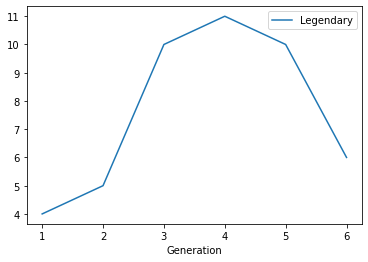

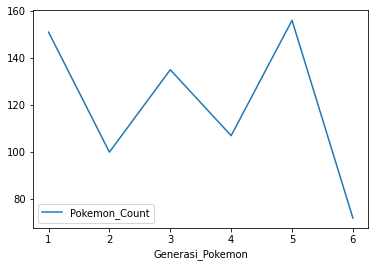

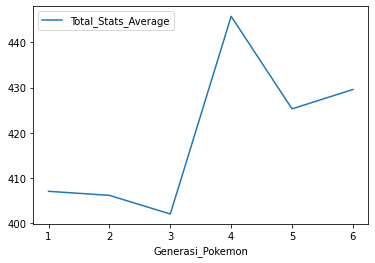

In [341]:
# Plot setiap dataframe grouping
df2.plot() # Plot Skenario 1
df_clean2.plot() # Plot Skenario 2
df_clean_mean.plot() # Plot Skenario 3

# F. Pengambilan Kesimpulan

Objective :
    ```
    Pokemon generasi terakhir memiliki rata-rata total power (Total Stat Average) yang lebih tinggi dibandingkan dengan semua pokemon di generasi lainnya.
    ```
Apakah statement ini benar...

Ternyata objective tidak meet. Dari hasil explorasi data, ```ternyata semakin baru generasi pokemon tidak menjamin Total_Stats_Average dari pokemon menjadi lebih tinggi dari generasi sebelumnya```. notes : meskipun trend nya cenderung meningkat.

Kesimpulan ini dapat kita lihat dri hasil plot terakhir (plot skenario ke 3). ***Generasi ke 4*** memiliki Total_Stats_Average sebesar 445.757009, atau sekitar ***446***. Sedangkan ***Generasi ke 6*** yang diharapkan memiliki Total_Stats_Average sebesar 429.583333, atau sebesar ***430***.

Dari beberapa sumber Pokemon fans, berita gamers, dll, Developer pembuat story dan games Pokemon memang tampak lebih memfokuskan tidak pada jumlah pokemon baru di setiap generasi, namun justru lebih kepada ***eksklusivitas legendary Pokemon*** dan nilai ***Total_Stats_Average yang lebih balance*** (tinggi, namun tidak terlalu overwhelmed) (terlihat dari jumlah pokemon - baik legendary maupun non legendary - yang semakin menurun di setiap generasi baru release).

Salam, Handoko Pramulyo (FTDS batch 14) | handoko.pramulyo.14@gmail.com